# wrangle_act_p2  - contd cleaning 

In [2]:
#import packages
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#define working dir
#os.chdir('C:/Users/gk-km/Documents/project')

In [4]:
#load data
tempdf_final = pd.read_csv('tempdf_final')

In [5]:
# inspect it
tempdf_final.head()

,tweet_id,timestamp,numerator,denominator,name,doggo,floofer,pupper,puppo,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,full_text,retweet_count
0,892420643555336193,2017-08-01,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,False,bagel,0.085851,False,banana,0.076110,False,38150,This is Phineas. He's a mystical boy. Only eve...,8346
1,892177421306343426,2017-08-01,13,10,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,Pekinese,0.090647,True,papillon,0.068957,True,32718,This is Tilly. She's just checking pup on you....,6171
2,891815181378084864,2017-07-31,12,10,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,malamute,0.078253,True,kelpie,0.031379,True,24636,This is Archie. He is a rare Norwegian Pouncin...,4081
3,891689557279858688,2017-07-30,13,10,Darla,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,41486,This is Darla. She commenced a snooze mid meal...,8490
4,891327558926688256,2017-07-29,12,10,Franklin,None,None,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,39665,This is Franklin. He would like you to stop ca...,9183


#### Define
continue to clean the data by tidying it up with the melt function
added subdataframes together to create the full melt result while dropping the duplicated columns
and testing

In [6]:
#code 
df1 = tempdf_final.melt(id_vars=['tweet_id', 'timestamp', 'favorite_count', 'retweet_count' , 'numerator', 'denominator'], 
              value_vars=['doggo', 'floofer', 'pupper', 'puppo'], var_name='stage', value_name = 'stage_name')
df1.head(2)

,tweet_id,timestamp,favorite_count,retweet_count,numerator,denominator,stage,stage_name
0,892420643555336193,2017-08-01,38150,8346,13,10,doggo,None
1,892177421306343426,2017-08-01,32718,6171,13,10,doggo,None


In [7]:
df2 = tempdf_final.melt(id_vars=['tweet_id','timestamp', 'favorite_count', 'retweet_count' , 'numerator', 'denominator'], 
              value_vars=['p1', 'p2', 'p3'], var_name='prediction_level', value_name = 'prediction_value')
df2.head(2)

,tweet_id,timestamp,favorite_count,retweet_count,numerator,denominator,prediction_level,prediction_value
0,892420643555336193,2017-08-01,38150,8346,13,10,p1,orange
1,892177421306343426,2017-08-01,32718,6171,13,10,p1,Chihuahua


In [8]:
df3 = tempdf_final.melt(id_vars=['tweet_id', 'timestamp', 'favorite_count', 'retweet_count' , 'numerator', 'denominator'], 
              value_vars=['p1_conf', 'p2_conf','p3_conf'], var_name='confidence_level', value_name = 'confidence_value')
df3.head(2)

,tweet_id,timestamp,favorite_count,retweet_count,numerator,denominator,confidence_level,confidence_value
0,892420643555336193,2017-08-01,38150,8346,13,10,p1_conf,0.097049
1,892177421306343426,2017-08-01,32718,6171,13,10,p1_conf,0.323581


In [9]:
df4 = tempdf_final.melt(id_vars=['tweet_id', 'timestamp', 'favorite_count', 'retweet_count' , 'numerator', 'denominator'], 
              value_vars=['p1_dog', 'p2_dog', 'p3_dog'], var_name='is_breed', value_name = 'dog_value')
df4.head(2)

,tweet_id,timestamp,favorite_count,retweet_count,numerator,denominator,is_breed,dog_value
0,892420643555336193,2017-08-01,38150,8346,13,10,p1_dog,False
1,892177421306343426,2017-08-01,32718,6171,13,10,p1_dog,True


In [10]:
df1_2 = pd.merge(df1, df2, on='tweet_id', how='left', suffixes=('_',''))
df1_2.drop(['timestamp', 'favorite_count', 'retweet_count', 'numerator', 'denominator'], axis = 1, inplace=True)
df1_2.head(2)


,tweet_id,timestamp_,favorite_count_,retweet_count_,numerator_,denominator_,stage,stage_name,prediction_level,prediction_value
0,892420643555336193,2017-08-01,38150,8346,13,10,doggo,None,p1,orange
1,892420643555336193,2017-08-01,38150,8346,13,10,doggo,None,p2,bagel


In [11]:
df1_3 = pd.merge(df1_2, df3, on='tweet_id', how='left', suffixes=('_',''))
df1_3.drop(['timestamp', 'favorite_count', 'retweet_count', 'numerator', 'denominator'], axis = 1, inplace=True)
df1_3.head(2)

,tweet_id,timestamp_,favorite_count_,retweet_count_,numerator_,denominator_,stage,stage_name,prediction_level,prediction_value,confidence_level,confidence_value
0,892420643555336193,2017-08-01,38150,8346,13,10,doggo,None,p1,orange,p1_conf,0.097049
1,892420643555336193,2017-08-01,38150,8346,13,10,doggo,None,p1,orange,p2_conf,0.085851


In [12]:
df1_4 = pd.merge(df1_3, df4, on='tweet_id', how='left', suffixes=('_',''))
df1_4.drop(['timestamp', 'favorite_count', 'retweet_count', 'numerator', 'denominator', 'stage_name'], axis = 1, inplace=True)

df1_4.head(2)

,tweet_id,timestamp_,favorite_count_,retweet_count_,numerator_,denominator_,stage,prediction_level,prediction_value,confidence_level,confidence_value,is_breed,dog_value
0,892420643555336193,2017-08-01,38150,8346,13,10,doggo,p1,orange,p1_conf,0.097049,p1_dog,False
1,892420643555336193,2017-08-01,38150,8346,13,10,doggo,p1,orange,p1_conf,0.097049,p2_dog,False


In [13]:
# Correct the column names
df1_4.rename(columns = {'timestamp_' : 'timestamp', 'favorite_count_': 'favorite_count', 'retweet_count_': 'retweet_count', 'numerator_' : 'numerator', 'denominator_' : 'denominator'}, inplace=True)
# Test
df1_4.columns


Index(['tweet_id', 'timestamp', 'favorite_count', 'retweet_count', 'numerator',
       'denominator', 'stage', 'prediction_level', 'prediction_value',
       'confidence_level', 'confidence_value', 'is_breed', 'dog_value'],
      dtype='object')

In [14]:
#### Define - clean tweet Id and timestamp again
#### code
df1_4['tweet_id'] = df1_4['tweet_id'].astype(object)
df1_4['timestamp'] = pd.to_datetime(df1_4.timestamp)
df1_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223344 entries, 0 to 223343
Data columns (total 13 columns):
tweet_id            223344 non-null object
timestamp           223344 non-null datetime64[ns]
favorite_count      223344 non-null int64
retweet_count       223344 non-null int64
numerator           223344 non-null int64
denominator         223344 non-null int64
stage               223344 non-null object
prediction_level    223344 non-null object
prediction_value    223344 non-null object
confidence_level    223344 non-null object
confidence_value    223344 non-null float64
is_breed            223344 non-null object
dog_value           223344 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 22.4+ MB


In [15]:
# polishing - rename, add new column
df1_4.rename(columns = {'is_breed' : 'breed_level', 'dog_value' : 'is_breed'}, inplace=True)


In [16]:
#adding a rating column
rating = (df1_4['numerator'] / df1_4['denominator'])
df1_4['rating'] = rating
df_master = df1_4
df_master.head()

,tweet_id,timestamp,favorite_count,retweet_count,numerator,denominator,stage,prediction_level,prediction_value,confidence_level,confidence_value,breed_level,is_breed,rating
0,892420643555336193,2017-08-01,38150,8346,13,10,doggo,p1,orange,p1_conf,0.097049,p1_dog,False,1.3
1,892420643555336193,2017-08-01,38150,8346,13,10,doggo,p1,orange,p1_conf,0.097049,p2_dog,False,1.3
2,892420643555336193,2017-08-01,38150,8346,13,10,doggo,p1,orange,p1_conf,0.097049,p3_dog,False,1.3
3,892420643555336193,2017-08-01,38150,8346,13,10,doggo,p1,orange,p2_conf,0.085851,p1_dog,False,1.3
4,892420643555336193,2017-08-01,38150,8346,13,10,doggo,p1,orange,p2_conf,0.085851,p2_dog,False,1.3


In [17]:
#adding a year column
year = df_master.timestamp.dt.year
df_master['year'] = year

In [18]:
# 'Completed' the cleaning phase
df_master = df1_4
df_master.head()

,tweet_id,timestamp,favorite_count,retweet_count,numerator,denominator,stage,prediction_level,prediction_value,confidence_level,confidence_value,breed_level,is_breed,rating,year
0,892420643555336193,2017-08-01,38150,8346,13,10,doggo,p1,orange,p1_conf,0.097049,p1_dog,False,1.3,2017
1,892420643555336193,2017-08-01,38150,8346,13,10,doggo,p1,orange,p1_conf,0.097049,p2_dog,False,1.3,2017
2,892420643555336193,2017-08-01,38150,8346,13,10,doggo,p1,orange,p1_conf,0.097049,p3_dog,False,1.3,2017
3,892420643555336193,2017-08-01,38150,8346,13,10,doggo,p1,orange,p2_conf,0.085851,p1_dog,False,1.3,2017
4,892420643555336193,2017-08-01,38150,8346,13,10,doggo,p1,orange,p2_conf,0.085851,p2_dog,False,1.3,2017


## Analysing and Visualizing Data for this Project

#### Store

In [19]:
df_master.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

In [20]:
#select all numeric variables
df_num = df_master.select_dtypes(include= ['float64', 'int64'])
df_num.head()

,favorite_count,retweet_count,numerator,denominator,confidence_value,rating,year
0,38150,8346,13,10,0.097049,1.3,2017
1,38150,8346,13,10,0.097049,1.3,2017
2,38150,8346,13,10,0.097049,1.3,2017
3,38150,8346,13,10,0.085851,1.3,2017
4,38150,8346,13,10,0.085851,1.3,2017


In [31]:
df_num.describe()

,favorite_count,retweet_count,confidence_value,rating
count,223344.000000,223344.000000,2.233440e+05,223344.000000
mean,8440.532882,2815.276112,2.632591e-01,1.169576
std,12701.619705,4892.087516,2.909963e-01,3.992735
min,0.000000,12.000000,1.740170e-10,0.000000
25%,1605.000000,598.500000,5.093465e-02,1.000000
50%,3714.000000,1324.500000,1.351775e-01,1.100000
75%,10568.500000,3249.500000,3.796912e-01,1.200000
max,164691.000000,83927.000000,1.000000e+00,177.600000


[6.0, 4.0]

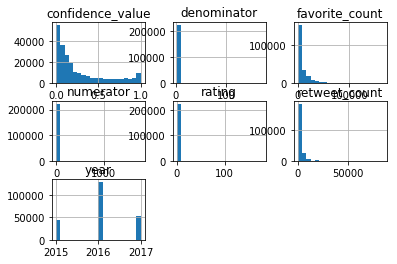

In [21]:
#distribution of numeric variables
df_num.hist(bins = 20)
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize']


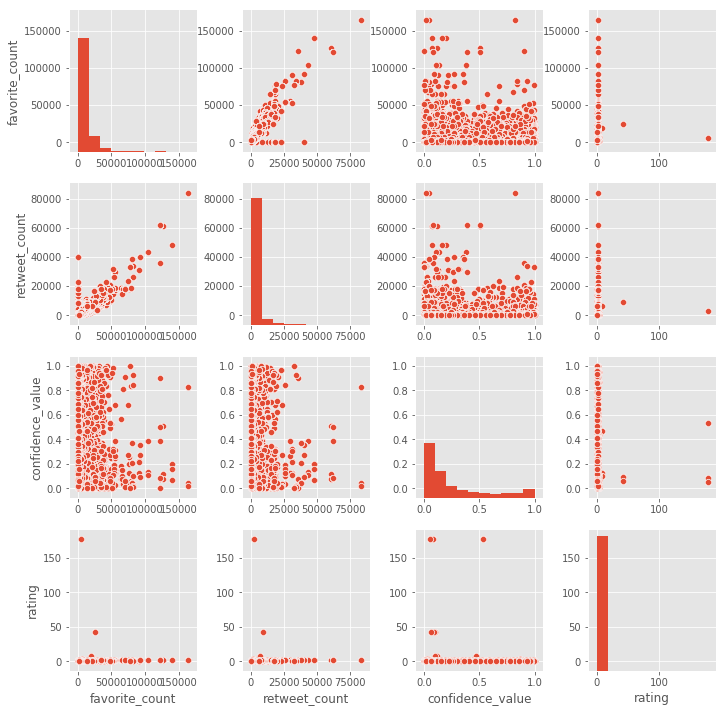

In [22]:
#Could there be some relation btween favorite count, retweet and rating?
#Create the default pairplot
df_num = df_num.drop(['numerator', 'denominator', 'year'], axis = 1)
sns.pairplot(df_num)

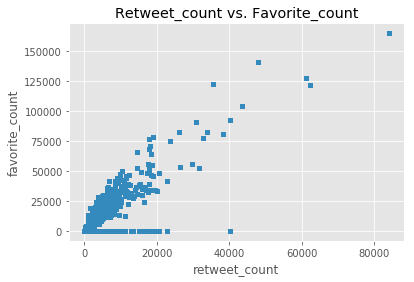

In [23]:
#postive relation only in retweet and favourite pair - expected as shown above!
#correlation Plot - positive relation
df_master.plot(kind='scatter', x = 'retweet_count', y= 'favorite_count')
plt.title("Retweet_count vs. Favorite_count")
plt.show()


In [41]:
dfcorr = df_master[['retweet_count','favorite_count']]
dfcorr.corr(method='pearson')

,retweet_count,favorite_count
retweet_count,1.000000,0.856799
favorite_count,0.856799,1.000000


In [ ]:
WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. Yes its a place to humor you and s>>>>>>>>>>>>>

In [24]:
df_master.sort_values(by = 'prediction_value', ascending = False).head()
#prediction_values do not have the actual dog names...like zebra!
#how can the P1 level at 0.997 confidence level call a dog zebra- unless its not the literal meaning

,tweet_id,timestamp,favorite_count,retweet_count,numerator,denominator,stage,prediction_level,prediction_value,confidence_level,confidence_value,breed_level,is_breed,rating,year
47796,671390180817915904,2015-12-19,1449,753,7,10,doggo,p1,zebra,p3_conf,0.000575,p1_dog,False,0.7,2015
151386,679530280114372609,2016-02-01,4988,2219,7,10,pupper,p3,zebra,p3_conf,0.006481,p1_dog,True,0.7,2016
151384,679530280114372609,2016-02-01,4988,2219,7,10,pupper,p3,zebra,p2_conf,0.169007,p2_dog,False,0.7,2016
151383,679530280114372609,2016-02-01,4988,2219,7,10,pupper,p3,zebra,p2_conf,0.169007,p1_dog,True,0.7,2016
151382,679530280114372609,2016-02-01,4988,2219,7,10,pupper,p3,zebra,p1_conf,0.750256,p3_dog,False,0.7,2016


In [25]:
#find the types of dogs predicted
df_types =df_master.groupby('prediction_value').size()
most_predicted = df_types.sort_values()[-10:]
most_predicted

prediction_value
cocker_spaniel         3384
chow                   3456
pug                    3492
toy_poodle             3780
Pomeranian             3888
Cardigan               4140
Pembroke               5112
Chihuahua              6588
Labrador_retriever    10188
golden_retriever      10440
dtype: int64

Text(0,0.5,'Prediction_value')

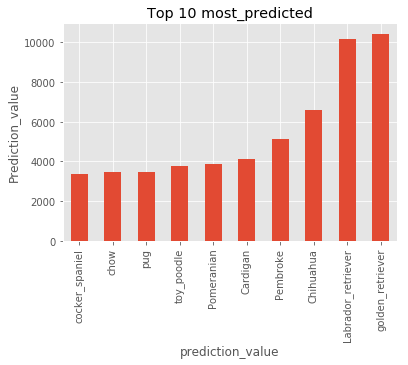

In [26]:
#plot the 10 most predicted dogs
df_types.sort_values()[-10:].plot(kind='bar')
plt.title('Top 10 most_predicted')
plt.ylabel('Prediction_value')


In [27]:
#full list of prediction values
df_types.sort_values().head()

prediction_value
passenger_car       36
mushroom            36
buckeye             36
bulletproof_vest    36
bullfrog            36
dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f903fe507b8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f903d2bcef0>], dtype=object)

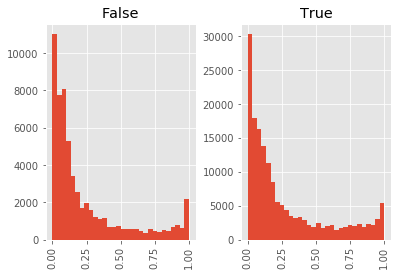

In [28]:
#Does being a  breed influence the algorithms' prediction - does not seem so!
df_master.hist(column="confidence_value",by="is_breed",bins=30)

In [29]:
#ratio of breeds compared to none
breed = len(df_master[df_master.is_breed == True])
not_breed = len(df_master[df_master.is_breed != True])
percent = (breed/(breed+not_breed)*100)
print('breed', breed ,'-', percent, '\n', 'not_breed', not_breed )

breed 164520 - 73.66215344938749 
 not_breed 58824


In [ ]:
End - wrangle.act